In [166]:
REG_URL="https://registry.npmjs.org/"
GIT_RAW="https://raw.githubusercontent.com/"
packages = ["ssh2", "bcrypt-pbkdf", "react","xterm", "@types/chai"]
selected=packages[0]

In [167]:
import requests
import re
import json
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# def getDependencies(selected):
    

In [168]:
res = requests.get(REG_URL + selected)
if res.status_code != 200:
    print("NPM lookup failed")
git_url = res.json()['repository']['url']
git_url

'git+ssh://git@github.com/mscdex/ssh2.git'

In [169]:
git_sub_url = re.split(".com\/*", git_url)
git_id = re.split("\.git", git_sub_url[1])[0]
# git_id = re.split("^*(\.git)", temp[1])

# if(len(git_id) != 2):
#     print("NPM lookup / github parse failed")
git_id

'mscdex/ssh2'

In [170]:
#https://raw.githubusercontent.com/mscdex/ssh2/master/package.json
res = requests.get(GIT_RAW+git_id + "/master/package.json")
print(res.text)

{
  "name": "ssh2",
  "version": "1.5.0",
  "author": "Brian White <mscdex@mscdex.net>",
  "description": "SSH2 client and server modules written in pure JavaScript for node.js",
  "main": "./lib/index.js",
  "engines": {
    "node": ">=10.16.0"
  },
  "dependencies": {
    "asn1": "^0.2.4",
    "bcrypt-pbkdf": "^1.0.2"
  },
  "devDependencies": {
    "@mscdex/eslint-config": "^1.0.0",
    "eslint": "^7.0.0"
  },
  "optionalDependencies": {
    "cpu-features": "0.0.2",
    "nan": "^2.15.0"
  },
  "scripts": {
    "install": "node install.js",
    "rebuild": "node install.js",
    "test": "node test/test.js",
    "lint": "eslint --cache --report-unused-disable-directives --ext=.js .eslintrc.js examples lib test",
    "lint:fix": "npm run lint -- --fix"
  },
  "keywords": [
    "ssh",
    "ssh2",
    "sftp",
    "secure",
    "shell",
    "exec",
    "remote",
    "client"
  ],
  "licenses": [
    {
      "type": "MIT",
      "url": "http://github.com/mscdex/ssh2/raw/master/LICENSE"
    

In [171]:
#grab the (dev)dependencies names
package = json.loads(res.text)
dependencies = {"dev": [], "prod": []}
if "devDependencies" in package:
    for dep in package["devDependencies"]:
            dependencies["dev"].append(dep)
            
if "dependencies" in package:
    for dep in package["dependencies"]:
            dependencies["prod"].append(dep)
        
print(dependencies)


{'dev': ['@mscdex/eslint-config', 'eslint'], 'prod': ['asn1', 'bcrypt-pbkdf']}


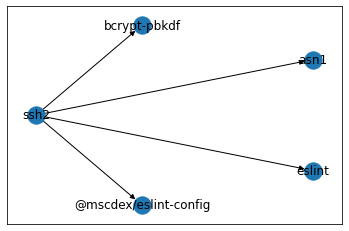

In [173]:
G = nx.DiGraph()

edges = []
for dep in dependencies["dev"]:
    edges.append((selected,dep))
for dep in dependencies["prod"]:
    edges.append((selected,dep))    

G.add_edges_from(edges)
# G.add_edges_from([(1,8)]) 
# plt.figure(figsize =(9, 9))
pos = nx.shell_layout(G)
nx.draw_networkx(G, pos)